In [22]:
from experiment_config import config
import numpy as np
from data_api import Loader
from functions import transform_distribution
from mixture_model import ReadMixture
from priors import ThetaGenerator
from evaluation.admixture import AdmixtureEvaluator
from project_logger import setup_logger, FILE_HANDLER
import pandas as pd
logger = setup_logger()
import plots
import pickle
from evaluation.generative import GenerativeEvaluator

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Results

In [86]:
loader = Loader(config)

In [69]:
loader = Loader(config)
loader.group_wbc(config.WBC_NAME, by_markers=True)

# Model Evaluation #
model = ReadMixture(atlas=loader.train_atlas, init_theta=loader.theta, marker_importance=loader.markers_importance,
                    P_pseudo_cnts=config.P_PSEUDO_CNTS, plot_EM=False)

# # not included in the test. One can decide to estimate wbc dist by whole blood samples.
# wbc_dist = loader.train_atlas.get_tissue(config.WBC_NAME, 'dist')
# wbc_cnts = loader.train_atlas.get_tissue(config.WBC_NAME, 'cnts')

In [96]:
loader.markers_importance.to_csv("V.csv")
loader.train_atlas.depth_df.to_csv("depth_df.csv")

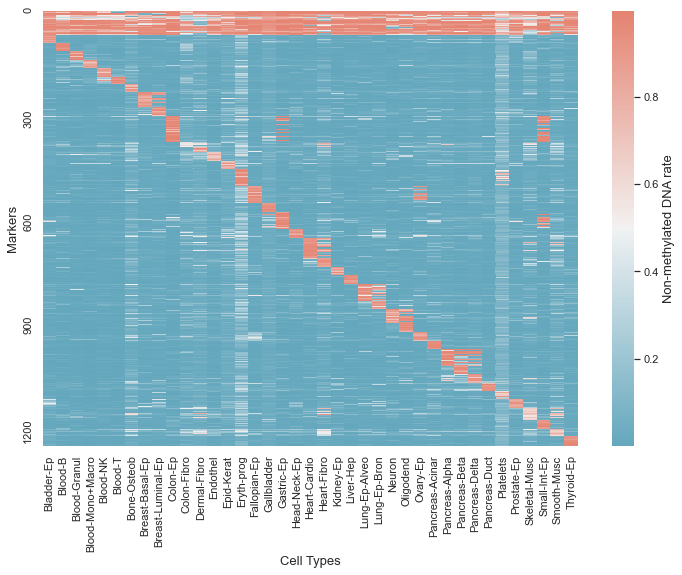

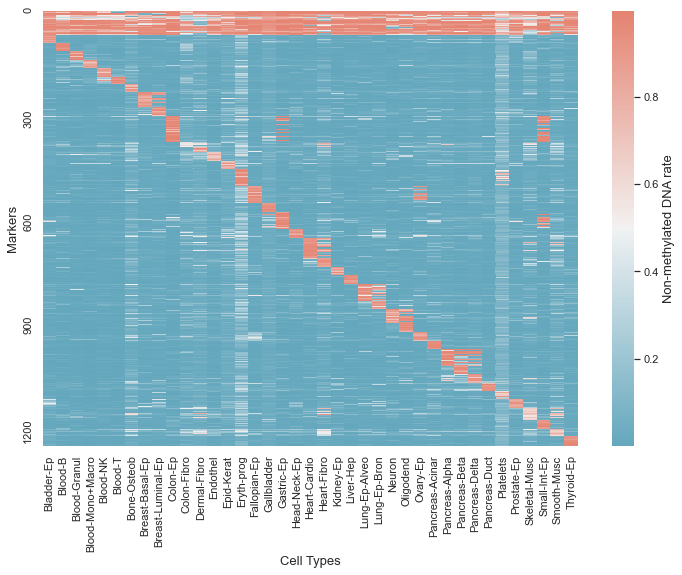

In [92]:
markers_importance_heatmap(loader.markers, loader.train_atlas)

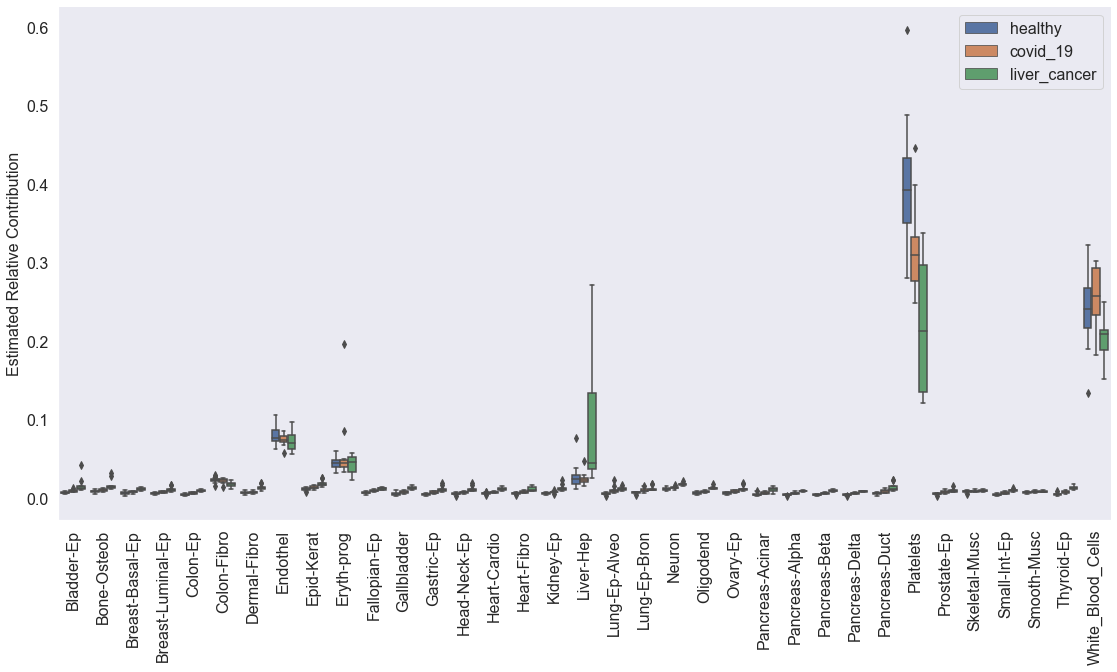

In [85]:
sns.catplot(x='variable', y='value', hue='sample', data=all_estimations, kind='box', height=8, aspect=2, legend=False)

plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.ylabel("Estimated Relative Contribution", fontsize=16)
plt.xlabel("")
plt.show()

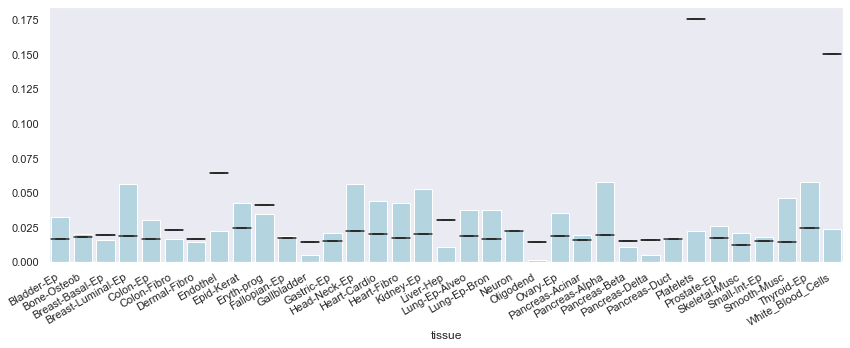

In [68]:
results
sns.set_style(style="dark")
f, ax = plt.subplots(figsize=(12, 5))
df = pd.DataFrame(np.array(results)[:, :, 0], columns=theta.index)
sns.boxplot(data=df, ax=ax, palette='Oranges')
# ax.set_ylabel('Estimation')
# ax2 = ax.twinx()
sns.barplot(data=theta.reset_index(), x='tissue', y='value', ax=ax, color='lightblue', label='True')
# ax.set_xlabel("")
ax.set_ylabel("")

f.autofmt_xdate()
f.tight_layout()
plt.show();

In [3]:
folder = r"C:\Guy\University\third year\final_project\results\admix\Report_new_results"
with open(folder + r"\results.pkl", 'rb') as f:
    admix_results = pickle.load(f)

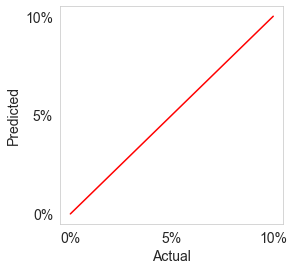

In [93]:
f, ax = plt.subplots(figsize=(4,4))

ax.plot(alphas, c='r')

ax.set_xticks([0, 1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(labels)

ax.set_yticks(alphas)
ax.set_yticklabels(labels)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.grid(False)
plt.show()

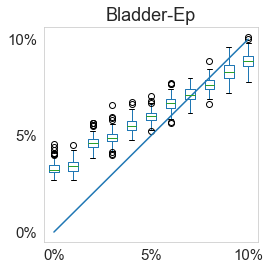

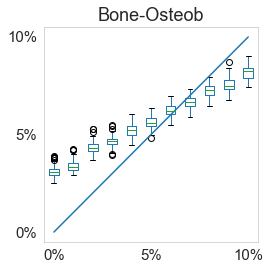

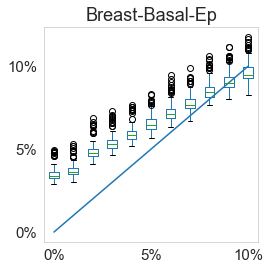

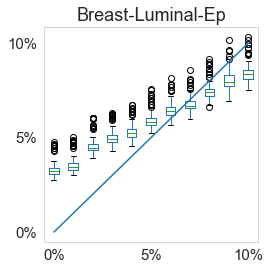

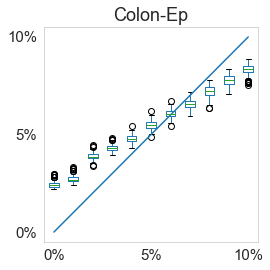

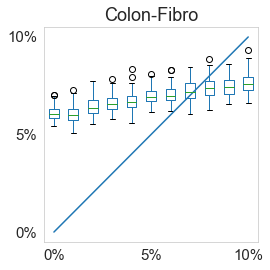

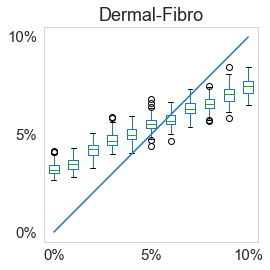

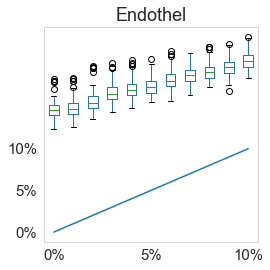

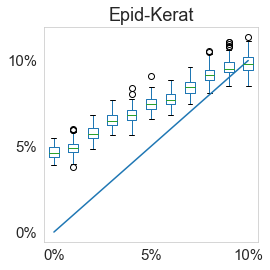

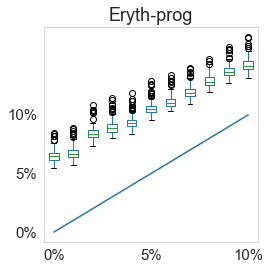

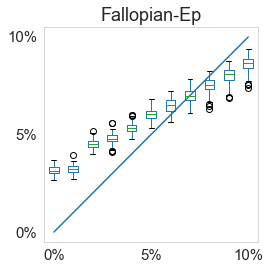

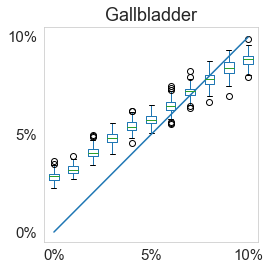

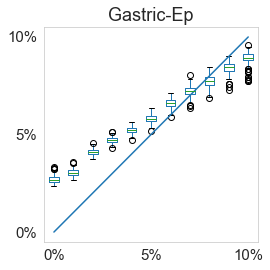

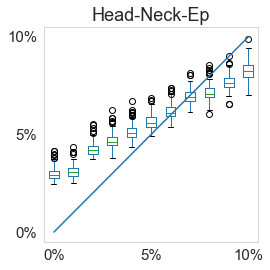

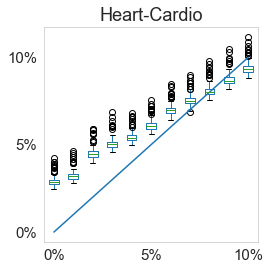

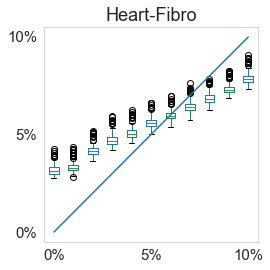

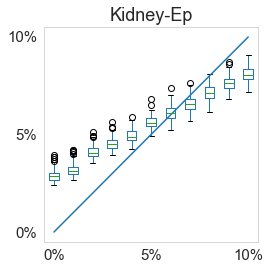

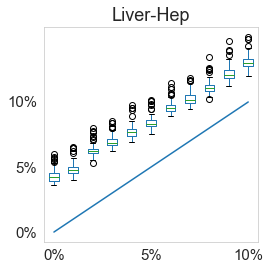

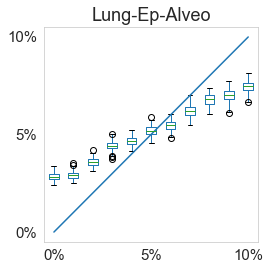

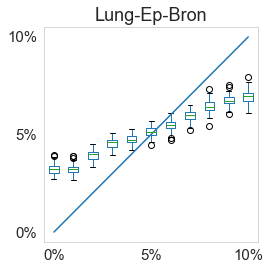

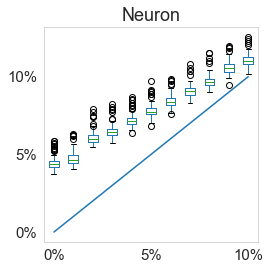

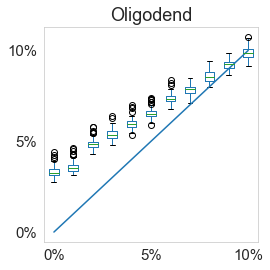

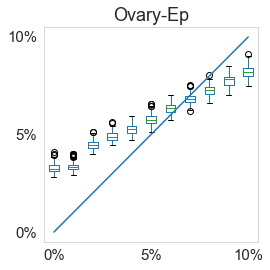

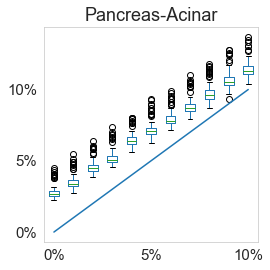

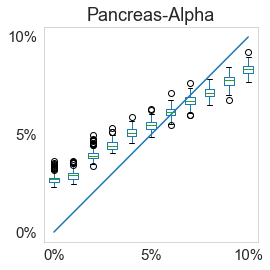

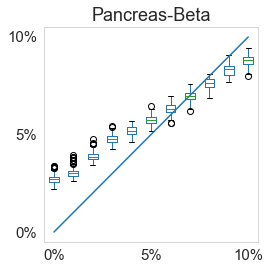

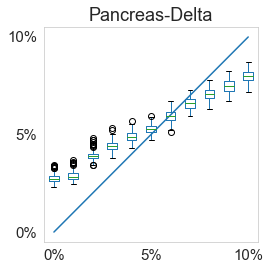

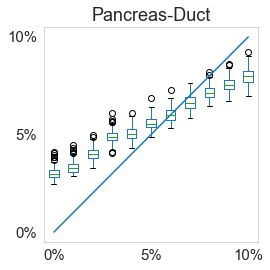

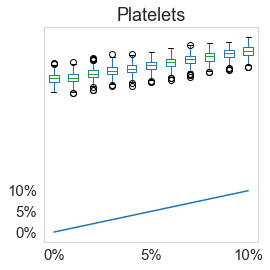

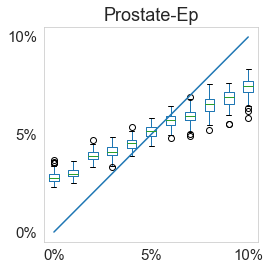

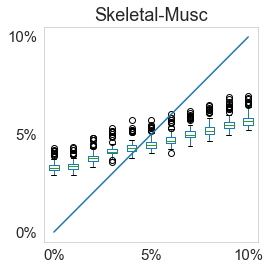

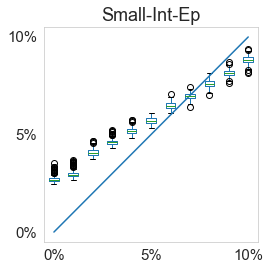

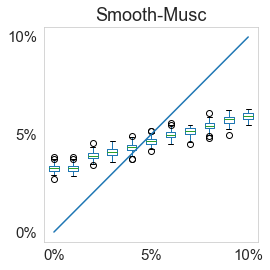

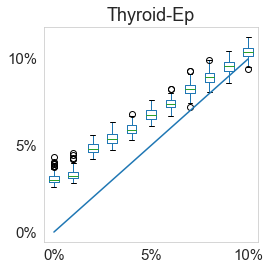

In [11]:
plt.rcParams.update({'font.size': 15})
labels = ["0%", '', '', '', '', '5%', '', '', '', '', "10%"]
# f, axes = plt.subplots(5,7, figsize=(21,25))
# plt.gca().set_aspect('equal', adjustable='box')
# axes = axes.flatten()
for i, (cell_type, cell_df) in enumerate(admix_results.items()):
#     alphas = cell_df.columns
    
    ax = cell_df.boxplot(figsize=(4,4))
    axes[i].set_aspect('equal')
    ax.grid(False)
    

    locs = ax.get_xticks()
    ax.plot(locs, alphas)
    ax.set_title(cell_type)
    ax.set_xticklabels(labels)

    ax.get_yticks()
    ax.set_yticks(alphas)
    ax.set_yticklabels(labels)

    plt.tight_layout()
    f.savefig(folder + '\{}.png'.format(cell_type))
    plt.show()

In [119]:
import matplotlib.image as mpimg
import glob
from mpl_toolkits.axes_grid1 import ImageGrid


images = []
for img_path in glob.glob(folder + f'/*.png'):
    images.append(mpimg.imread(img_path))

TypeError: Invalid shape (34, 216, 216, 4) for image data

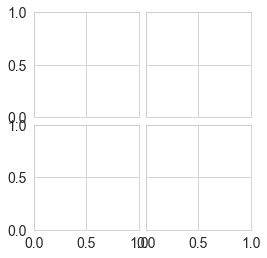

In [120]:
fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [images]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [111]:
for cell_type, df in admix_results.items():
    df['tissue'] = cell_type
df = pd.concat(list(admix_results.values()))
df = df.melt(id_vars='tissue', var_name='alpha')

In [115]:
g = sns.FacetGrid(df, col="tissue", height=30, aspect=1, col_wrap=8)
g.map(sns.boxplot, 'alpha', 'value')

In [ ]:
for t in loader.tissues:
    if t == 'blood_cells':
        continue
    else:
        

In [19]:

plt.show()

In [8]:
admix_results['Bladder-Ep']

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10
0,0.011103,0.013244,0.015222,0.015697,0.018794,0.023185,0.024164,0.028716,0.026937,0.032774,0.034944
1,0.011634,0.013413,0.014979,0.018559,0.020160,0.023256,0.025645,0.025751,0.030811,0.031075,0.033195
2,0.010232,0.012818,0.013804,0.018321,0.020074,0.021296,0.026634,0.028097,0.030011,0.030514,0.034165
3,0.010734,0.011748,0.014309,0.016052,0.019226,0.020756,0.025358,0.028829,0.030738,0.034459,0.032362
4,0.009955,0.012570,0.015939,0.017278,0.018845,0.022437,0.028035,0.028792,0.029859,0.033258,0.036227
...,...,...,...,...,...,...,...,...,...,...,...
110,0.010707,0.012671,0.015989,0.018176,0.020151,0.022086,0.024922,0.028031,0.029111,0.030449,0.036210
111,0.011178,0.014197,0.016645,0.018566,0.021953,0.021607,0.025388,0.028913,0.031327,0.032608,0.033983
112,0.010251,0.012466,0.014442,0.019661,0.021745,0.021158,0.024529,0.028052,0.027372,0.033195,0.036143
113,0.010691,0.014030,0.016500,0.016907,0.019318,0.023184,0.025898,0.030057,0.028953,0.030930,0.036318


# End Results

In [75]:
def markers_importance_heatmap(markers, atlas):
    markers['direction'] = 'U'
    markers['direction'][(markers['cell_avg'] - markers['other_avg'] > 0)] = 'M'

    df = markers[[config.MARKER_INDEX, 'direction']].join(markers.significant_cell.explode())
    df = df.sort_values(by=['direction', 'significant_cell']).drop_duplicates(config.MARKER_INDEX)
    sorted_markers = df[config.MARKER_INDEX]
    data = atlas.Pm.loc[sorted_markers].reset_index(drop=True)

    f = plt.figure(figsize=(12, 8))
    ax = sns.heatmap(data, cmap=sns.diverging_palette(220, 20, s=65, l=65, as_cmap=True),
                     yticklabels=300)
    ax.figure.axes[-1].yaxis.label.set_size(13)
    ax.set_xlabel("Cell Types", fontsize=13)
    ax.set_ylabel("Markers", fontsize=13)
    ax.tick_params('both', labelsize=11)
    plt.show()
    return f

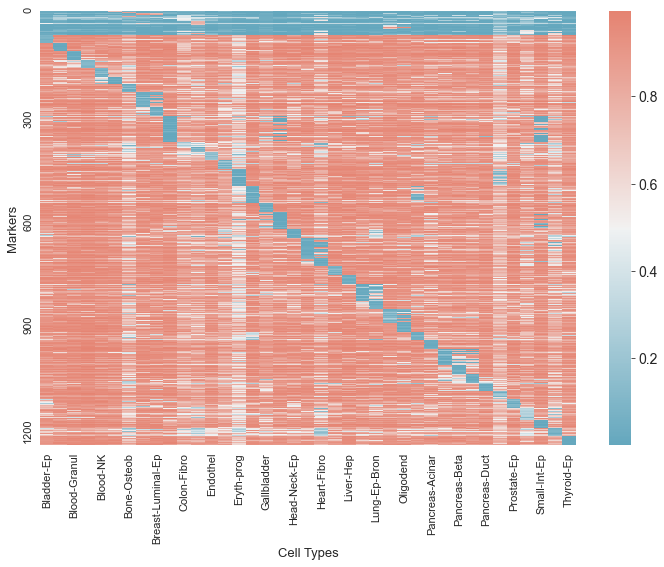

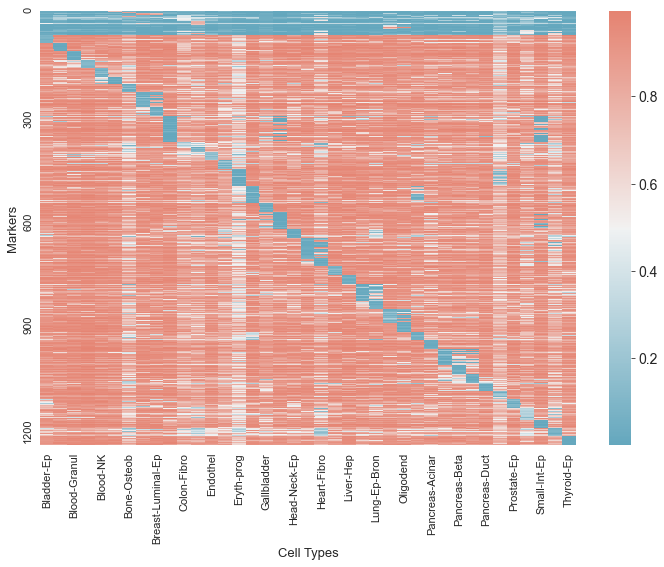

In [76]:
markers_importance_heatmap(loader.markers, loader.train_atlas)

In [49]:
config.THETA_PSEUDO_CNTS = 0.001
loader = Loader(config)
loader.group_wbc(config.WBC_NAME)
loader.subset_tissues(['Pancreas-Delta', config.WBC_NAME], relevant_markers=False)

In [88]:
healthy_profiles = loader.load_mixed_samples("..\data\pathologies\healthy_cfdna\\")
covid_profiles = loader.load_mixed_samples("..\data\pathologies\covid\\")
liver_profiles = loader.load_mixed_samples("..\data\pathologies\liver\\")

In [ ]:
from scipy.stats import ttest_ind

class HypothesisTesting:
    def __init__(self, loader, config):
        self.healthy = loader.load_mixed_samples("..\data\pathologies\healthy_cfdna\\")
        self.liver_cancer = loader.load_mixed_samples("..\data\pathologies\covid\\")
        self.covid19 = loader.load_mixed_samples("..\data\pathologies\liver\\")

    def evaluate(model):
        theta_healthy = estimate_samples(model, self.healthy)
        theta_liv_cancer = estimate_samples(model, self.liver_cancer)
        theta_covid = estimate_samples(model, self.covid19)
        
        plot_pathologies_estimation([healthy_est, covid_est, cancer_est], ['healthy', 'covid', 'Liver cancer'])
            

        pass

       
def estimate_samples(model, samples):
    results = pd.DataFrame(index=model.atlas.tissues)
    for i, profile in enumerate(samples):
        theta_hat = model.estimate_theta(profile)
        results[i] = theta_hat.values
    return results.T

def plot_pathologies_estimation(results, patho_names):
    f, ax = plt.subplots()
    for result, name in zip(results, patho_names):
        result.boxplot(ax=ax)
    plt.title(f"Estimates for {name}, over {result.shape[0]} samples")
    plt.show()

def identify_pathology_t_test():
    """
    Student's-T test: compare means of a disease related tissue. Null: theta_k_healthy >= theta_k_disease.
    """
    stat, t_p_val = ttest_ind(liv_health, liv_cancer, alternative='less')
    return t_p_val

    
def permutation_test(df, num_permutation):
    """
    Permutation test: healthy\disease is var X, tissue-k estimate are Var Y; Null: P(XY) = P(X)P(Y)
    """
    # compare for single tissue: columns ['healthy', 'pathology name']
    df = df.melt()
    rng = np.random.default_rng()
    actual_diff = np.diff(df.groupby('variable').mean(), axis=0).item()
    avg_diffs = []
    for i in np.arange(num_permutation):
        df['variable'] = rng.permutation(df['variable'])
        diff = np.diff(df.groupby('variable').mean(), axis=0).item()
        avg_diffs.append(diff)
    
    null_dist = np.array(avg_diffs)
    p_val = (null_dist > actual_diff).mean()
    return p_val

In [89]:
model = ReadMixture(loader.train_atlas, loader.theta, loader.V, loader.P_pseudo_counts, plot_EM=False)

## Healthy plasma

In [90]:
healthy_est = estimate_samples(model, healthy_profiles)
cancer_est = estimate_samples(model, liver_profiles)
covid_est = estimate_samples(model, covid_profiles)


In [97]:
all_estimations = pd.concat([healthy_est, cancer_est, covid_est], axis=0)
all_estimations['sample'] = ['healthy'] * len(healthy_est) + ['cancer'] * len(cancer_est) + ['covid'] * len(covid_est)
all_estimations = all_estimations.melt(id_vars='sample')
# covid_est.melt()
# cancer_est.melt()

,sample,variable,value
0,healthy,Bladder-Ep,0.001163
1,healthy,Bladder-Ep,0.001211
2,healthy,Bladder-Ep,0.001142
3,healthy,Bladder-Ep,0.001918
4,healthy,Bladder-Ep,0.000920
...,...,...,...
1570,covid,White_Blood_Cells,0.453199
1571,covid,White_Blood_Cells,0.545401
1572,covid,White_Blood_Cells,0.527007
1573,covid,White_Blood_Cells,0.529958


# Exploring Marker depth distribution

[Text(0.0, 0, ''),
 Text(5.0, 0, 'Hepatocytes markers'),
 Text(10.0, 0, ''),
 Text(15.0, 0, 'Other markers'),
 Text(20.0, 0, '')]

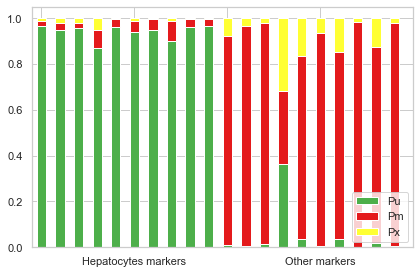

In [571]:
colors = sns.color_palette('Set1')
r = colors[0]
g = colors[2]
y = colors[5]

is_sig = loader.markers.significant_cell.apply(lambda x: name in x)
significant = loader.markers[is_sig].startCpG[:10]
not_significant = np.random.choice(loader.markers[~is_sig].startCpG, size=10)

sns.set_style('whitegrid')
df = train_atlas.get_tissue(name).drop(columns='N')
df = df.loc[list(significant) + list(not_significant)]
df.columns = ['Pu', 'Pm', 'Px']
f,ax = plt.subplots()
df.reset_index(drop=True).plot.bar(stacked=True, color=[g, r ,y], ax=ax)
plt.tight_layout()
ax.set_xticks(np.linspace(0,20, 5))
labs = ["", 'Hepatocytes markers',"", 'Other markers', ""]
ax.set_xticklabels(labs, rotation=0)

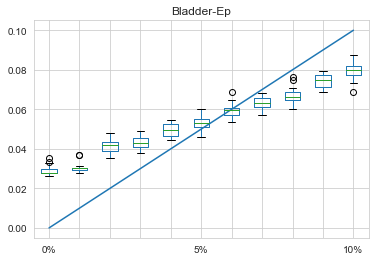

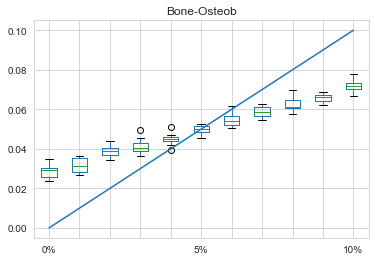

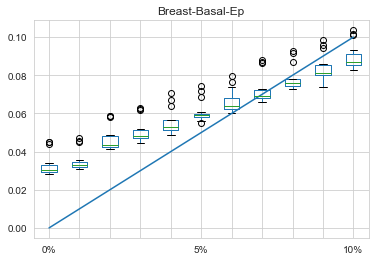

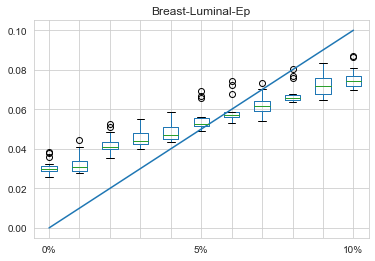

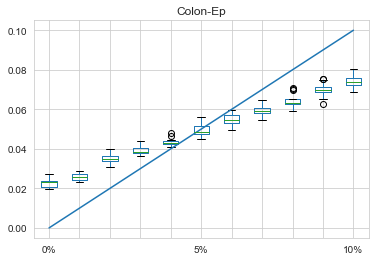

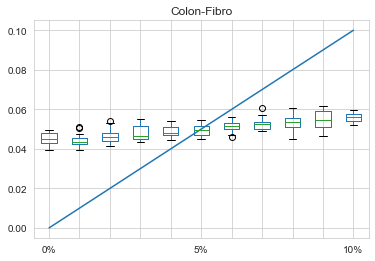

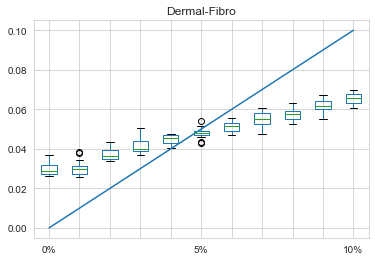

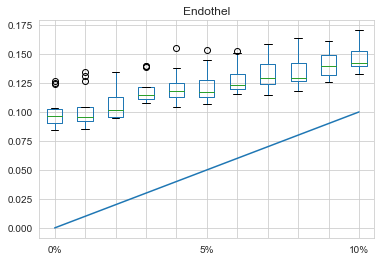

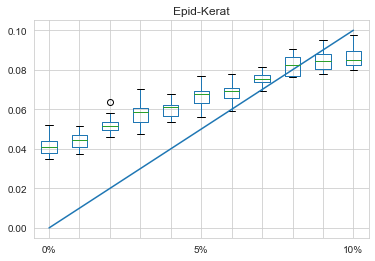

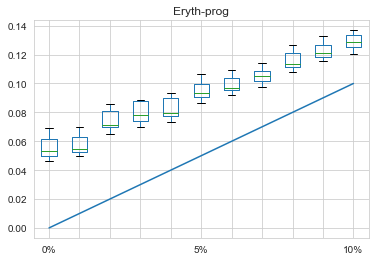

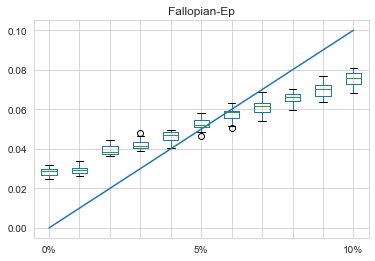

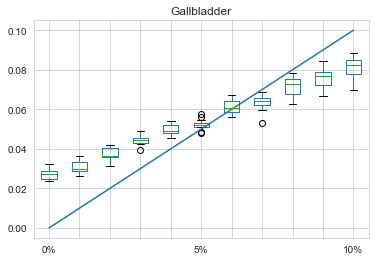

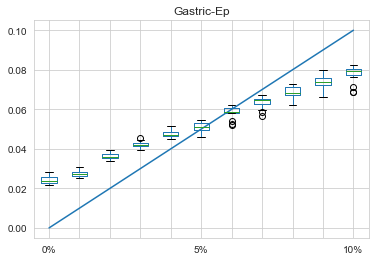

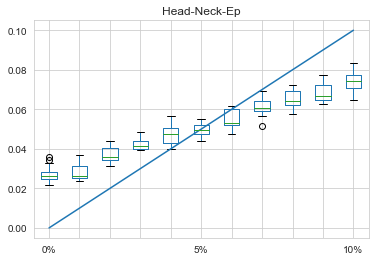

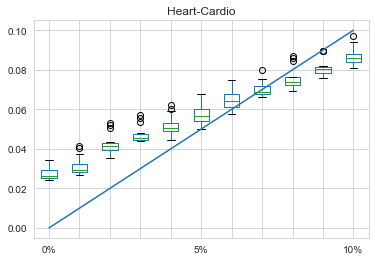

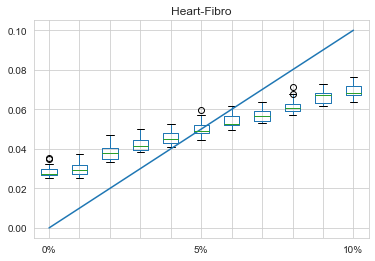

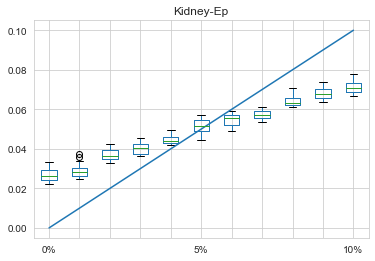

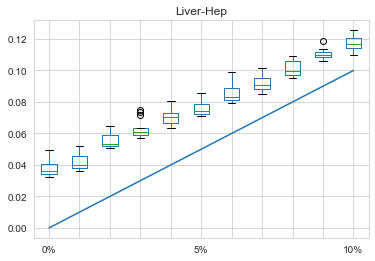

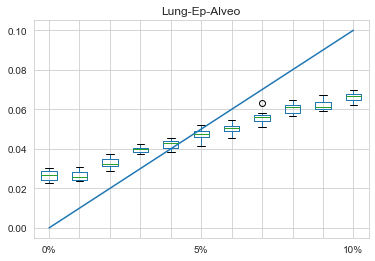

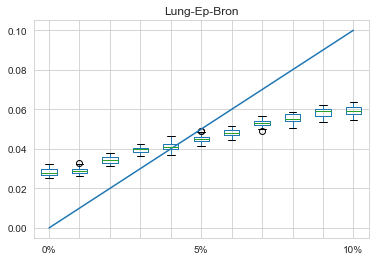

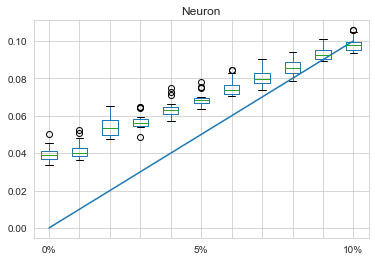

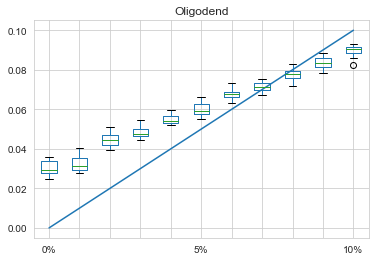

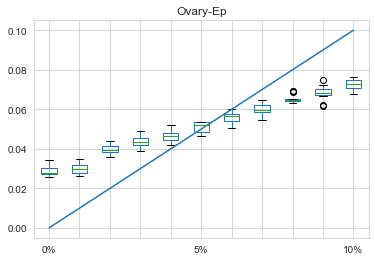

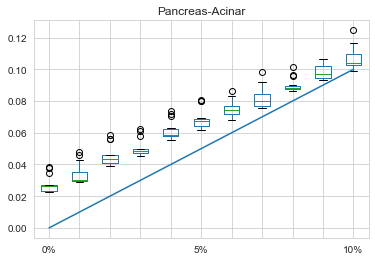

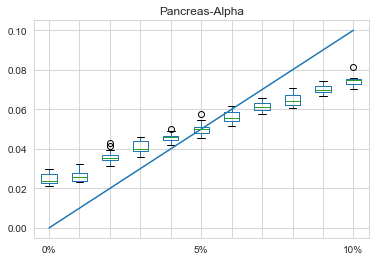

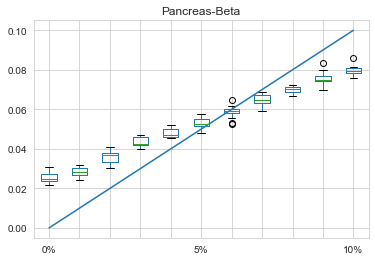

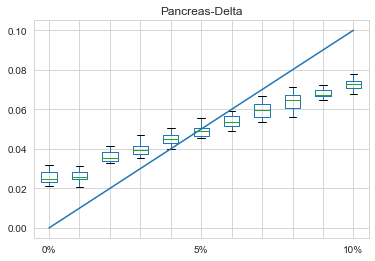

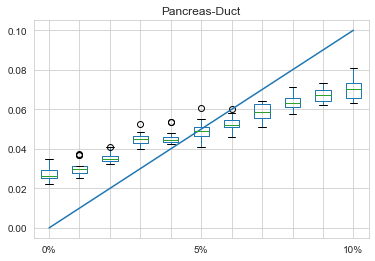

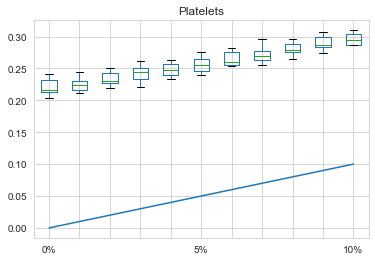

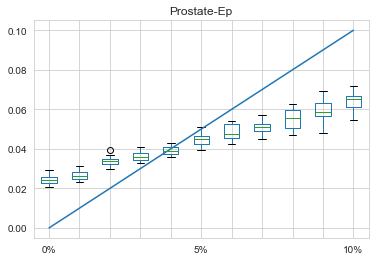

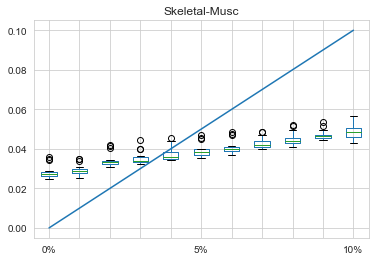

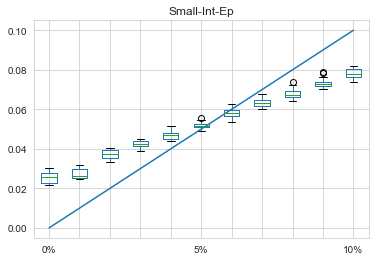

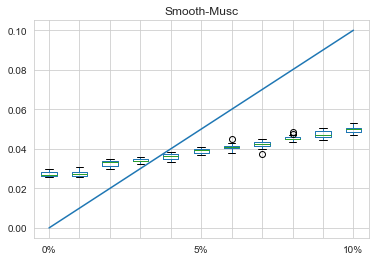

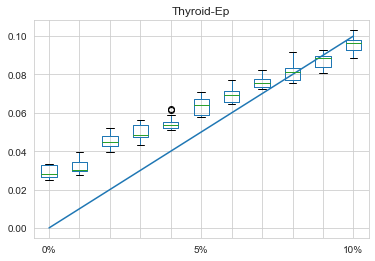

In [889]:
for t in loader.tissues:
    if t == 'blood_cells':
        continue
    else:
        f = plt.figure()
        ax = admixture_tissue_plot(t, results[t])
        f.savefig('admixture_results\{}.png'.format(t))

In [866]:
f.set_size_inches(300, 225)
f.savefig('admixture.png', scale='auto')